# Huge tennis database: ETL

In [1]:
#!pip install kagglehub
#!pip install kaggle
import kagglehub
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Database and tables

In [2]:
origin_db_file_name = 'database.sqlite'
kaggle_resource = 'guillemservera/tennis'
destination_db_file_name = 'tennisdb.sqlite'

### Download database from Kaggle API

You can find info about Kaggle authentication in: https://www.kaggle.com/docs/api, https://github.com/Kaggle/kagglehub?tab=readme-ov-file#authenticate
Once you have your token (kaggle.json), store it at ~/.kaggle/kaggle.json.

In [3]:
#path = kagglehub.dataset_download(kaggle_resource)
path = 'C:\\Users\\Carmelo\\.cache\\kagglehub\\datasets\\guillemservera\\tennis\\versions\\41'
#print("Path to dataset files:", path)
database_path = os.path.join(path, origin_db_file_name)

### Download database from Kaggle Website

As an alternative, you can also download the database from: https://www.kaggle.com/datasets/guillemservera/tennis?resource=download
Then, you can connect and query the Sqlite database

In [4]:
#path = 'Set your path here'
#database_path = os.path.join(path, db_file_name)

### Connect to SQLite database

In [5]:
try:
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    print(f"Tables in the database {origin_db_file_name}:")
    for table in tables:
        print(table[0])
        
except sqlite3.Error as err:
    print(f"An error ocurred during connection to database {origin_db_file_name}: {err}")

Tables in the database database.sqlite:
matches
players
rankings


### Create dataframes for tables

In [6]:
print("\nLet's query the tables and convert them into Pandas dataframes...")
print("\nCreating a dataframe for players...")
query = "SELECT * FROM players;"
players_df = pd.read_sql_query(query, conn)


Let's query the tables and convert them into Pandas dataframes...

Creating a dataframe for players...


In [7]:
print("\nCreating a dataframe for matches...")
query = "SELECT * FROM matches;"
matches_df = pd.read_sql_query(query, conn)


Creating a dataframe for matches...


In [8]:
print("\nCreating a dataframe for rankings...")
query = f"SELECT * FROM rankings;"
rankings_df = pd.read_sql_query(query, conn)


Creating a dataframe for rankings...


## Players table

In [9]:
print("\n---------------------- PLAYERS TABLE --- (first 5 rows) ----------")
players_df.head()


---------------------- PLAYERS TABLE --- (first 5 rows) ----------


,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [10]:
print("\n-->Number of rows and columns:\n")
print(players_df.shape)

print("\n-->Column data types:\n")
print(players_df.info())

print("\n-->Unique values for each column:\n")
for col in players_df.columns:
    print(f"{col}: {players_df[col].nunique()}")

print("\nMissing values per column:\n")
print((players_df.isnull() | (players_df == '')).sum())


-->Number of rows and columns:

(65019, 8)

-->Column data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65019 entries, 0 to 65018
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    65019 non-null  int64  
 1   name_first   64134 non-null  object 
 2   name_last    64971 non-null  object 
 3   hand         65002 non-null  object 
 4   dob          46447 non-null  float64
 5   ioc          64343 non-null  object 
 6   height       2819 non-null   float64
 7   wikidata_id  4894 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.0+ MB
None

-->Unique values for each column:

player_id: 65019
name_first: 14334
name_last: 39749
hand: 4
dob: 16818
ioc: 226
height: 37
wikidata_id: 4825

Missing values per column:

player_id          0
name_first       885
name_last         48
hand              17
dob            18572
ioc              676
height         62200
wikidata_id    6

You can visualize uniques values for columns like this:

In [11]:
players_df['ioc'].unique()

array(['USA', 'ECU', 'AUS', 'ITA', 'RSA', 'DEN', 'HUN', 'CHI', 'POL',
       'PER', 'IND', 'SWE', 'ESP', 'SUI', 'GER', 'ROU', 'CRO', 'JPN',
       'CZE', 'RUS', 'GBR', 'BRA', 'FRA', 'ZIM', 'SRB', 'NED', 'CAN',
       'GRE', 'MEX', 'JAM', 'COL', 'ARG', 'BEL', 'NZL', 'VEN', 'EGY',
       'BOL', 'AUT', 'PAK', 'YUG', 'NGR', 'PUR', 'PAR', 'IRL', 'IRI',
       'FIN', 'URU', 'ISR', 'KOR', 'CRC', 'MAR', 'HAI', 'LAT', 'INA',
       'SEN', 'LUX', 'BAH', 'SVK', 'UKR', 'PHI', 'TUR', 'HKG', 'CUB',
       'BUL', 'NOR', 'MAS', 'KEN', 'POR', 'GEO', 'THA', 'AND', 'CHN',
       'CIV', 'MKD', 'TPE', 'AHO', 'ESA', 'GUA', 'MON', 'GHA', 'SLO',
       'EST', 'TRI', 'ALG', 'DOM', 'BLR', 'UZB', 'CAF', 'ARM', 'QAT',
       'BIH', 'LIB', 'LTU', 'MDA', 'KUW', 'BEN', 'MRI', 'TUN', 'AZE',
       'KAZ', 'ISL', 'UAE', 'MNE', 'SLE', 'VIE', 'CYP', 'TOG', 'SRI',
       'BAR', 'SOL', 'ARU', 'TJK', 'NAM', 'MAD', 'SYR', 'MLT', 'CAM',
       'UGA', 'KGZ', 'LBA', 'BUR', 'RHO', 'ZAM', 'BER', 'MLI', 'SGP',
       'OMA', 'VAN',

### Missing values

In [12]:
print("\nReplacing values 'Unknown' by 'unknown'...\n")
players_df = players_df.replace('Unknown', 'unknown')


Replacing values 'Unknown' by 'unknown'...



In [13]:
print("\nRemoving Rows with empty/?/unknown 'Last Name'...\n")
players_df = players_df[~(
    players_df['name_last'].isnull() | 
    (players_df['name_last'].str.strip() == '') | 
    (players_df['name_last'].str.strip() == '?') | 
    (players_df['name_last'].str.strip() == 'unknown')
)]


Removing Rows with empty/?/unknown 'Last Name'...



In [14]:
string_columns = ['name_first', 'name_last', 'ioc', 'wikidata_id', 'height', 'hand']
for column in string_columns:
    print(f"Replacing NAN/empty/? '{column}' with 'unknown'...")
    players_df[column] = players_df[column].fillna('unknown')
    players_df[column] = players_df[column].apply(lambda x: 'unknown' if isinstance(x, str) and (x.strip() == '' or x.strip() == '?') else x)
    
# hand
print("Replacing 'U' 'hand' with 'unknown'...")
players_df.loc[players_df['hand'] == 'U', 'hand'] = 'unknown'

# dob - Date of Birth
print("Replacing empty 'dof' with 18000101 and converting to string...")
players_df['dob'] = players_df['dob'].fillna(18000101).astype(int).astype(str)

Replacing NAN/empty/? 'name_first' with 'unknown'...
Replacing NAN/empty/? 'name_last' with 'unknown'...
Replacing NAN/empty/? 'ioc' with 'unknown'...
Replacing NAN/empty/? 'wikidata_id' with 'unknown'...
Replacing NAN/empty/? 'height' with 'unknown'...
Replacing NAN/empty/? 'hand' with 'unknown'...
Replacing 'U' 'hand' with 'unknown'...
Replacing empty 'dof' with 18000101 and converting to string...


### Cleaning values

In [15]:
print("\nCleaning 'height' values...")
mask = players_df['height'] != 'unknown'
players_df.loc[mask, 'height'] = players_df.loc[mask, 'height'].astype(float).astype(int).astype(str)


Cleaning 'height' values...


In [16]:
print("\nConverting 'player_id' to String...")
players_df['player_id'] = players_df['player_id'].astype(str)


Converting 'player_id' to String...


In [17]:
print("\nFilling empty month and day and converting 'dob' to Date type...\n")
players_df['dob'] = players_df['dob'].apply(lambda x: x[:4] + '0101' if x.endswith('0000') else x)
players_df['dob'] = pd.to_datetime(players_df['dob'], format='%Y%m%d').dt.date


Filling empty month and day and converting 'dob' to Date type...



### New columns

In [18]:
print("\nCreating 'fullname' column according to ATP Tennis dataset format...")
print("Creating 'capitals_name_first' column...")

def format_name(name):
    return ".".join(part[0].upper() for part in name.split()) + "."

players_df['capitals_name_first'] = players_df['name_first'].apply(format_name)

mask = players_df['name_first'] == 'unknown'
players_df['fullname'] = players_df['name_last'].str.strip() + ' ' + players_df['capitals_name_first'].str.strip()
players_df.loc[mask, 'fullname'] = players_df.loc[mask, 'name_last'].str.strip()

print("Droping 'capitals_name_first' column...")
players_df = players_df.drop(columns=['capitals_name_first'])

print("Creating 'weight' column to 'unknown'...")
players_df['weight'] = 'unknown'

print("Creating 'instagram' column to 'unknown'...")
players_df['instagram'] = 'unknown'

print("Creating 'facebook' column to 'unknown'...")
players_df['facebook'] = 'unknown'

print("Creating 'x_twitter' column to 'unknown'...")
players_df['x_twitter'] = 'unknown'

print("Creating 'pro_since' column to 'unknown'...")
players_df['pro_since'] = 'unknown'


Creating 'fullname' column according to ATP Tennis dataset format...
Creating 'capitals_name_first' column...
Droping 'capitals_name_first' column...
Creating 'weight' column to 'unknown'...
Creating 'instagram' column to 'unknown'...
Creating 'facebook' column to 'unknown'...
Creating 'x_twitter' column to 'unknown'...
Creating 'pro_since' column to 'unknown'...


### Rename columns

In [19]:
print("\nRenaming columns...\n")
columns_dict = {
    'dob': 'birth_date',
    'ioc': 'country',
}
players_df.rename(columns=columns_dict, inplace=True)


Renaming columns...



### Duplicated players

In [20]:
duplicated_rows = players_df.duplicated(subset=['name_last', 'name_first', 'birth_date']).sum()
print(f"\nRemoving {duplicated_rows} duplicated rows...\n")

players_df.drop_duplicates(subset=['name_last', 'name_first', 'birth_date'], inplace=True)



Removing 484 duplicated rows...



In [21]:
players_df.head()

,player_id,name_first,name_last,hand,birth_date,country,height,wikidata_id,fullname,weight,instagram,facebook,x_twitter,pro_since
0,100001,Gardnar,Mulloy,R,1913-11-22,USA,185,Q54544,Mulloy G.,unknown,unknown,unknown,unknown,unknown
1,100002,Pancho,Segura,R,1921-06-20,ECU,168,Q54581,Segura P.,unknown,unknown,unknown,unknown,unknown
2,100003,Frank,Sedgman,R,1927-10-02,AUS,180,Q962049,Sedgman F.,unknown,unknown,unknown,unknown,unknown
3,100004,Giuseppe,Merlo,R,1927-10-11,ITA,unknown,Q1258752,Merlo G.,unknown,unknown,unknown,unknown,unknown
4,100005,Richard,Gonzalez,R,1928-05-09,USA,188,Q53554,Gonzalez R.,unknown,unknown,unknown,unknown,unknown


In [22]:
players_df.dtypes

player_id      object
name_first     object
name_last      object
hand           object
birth_date     object
country        object
height         object
wikidata_id    object
fullname       object
weight         object
instagram      object
facebook       object
x_twitter      object
pro_since      object
dtype: object

## Table rankings

In [23]:
print("\n---------------------- RANKING TABLE--- (first 5 rows) ----------")
rankings_df.head()


---------------------- RANKING TABLE--- (first 5 rows) ----------


,ranking_date,rank,player,points
0,20000110,1,101736,4135.0
1,20000110,2,102338,2915.0
2,20000110,3,101948,2419.0
3,20000110,4,103017,2184.0
4,20000110,5,102856,2169.0


In [24]:
print("\n-->Number of rows and columns:\n")
print(rankings_df.shape)

print("\n-->Column data types:\n")
print(rankings_df.info())

print("\n-->Unique values for each column:\n")
for col in rankings_df.columns:
    print(f"{col}: {rankings_df[col].nunique()}")

print("\nMissing values per column:\n")
print((rankings_df.isnull() | (rankings_df == "")).sum())


-->Number of rows and columns:

(3235639, 4)

-->Column data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235639 entries, 0 to 3235638
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 98.7 MB
None

-->Unique values for each column:

ranking_date: 2247
rank: 2266
player: 16174
points: 4531

Missing values per column:

ranking_date         0
rank                 0
player               0
points          376080
dtype: int64


### Missing values

In [25]:
rankings_df['points'] = rankings_df['points'].fillna('unknown')

### Data types

In [26]:
print("\nConverting 'points' column to string...")
rankings_df['points'] = rankings_df['points'].apply(
    lambda x: str(int(x)) if x != 'unknown' else x
)

print("Converting 'player' column to string...")
rankings_df['player'] = rankings_df['player'].astype(str)

print("Converting 'rank' column to string...")
rankings_df['rank'] = rankings_df['rank'].astype(str)

print("Converting 'ranking_date' column to Date type...")
rankings_df['ranking_date'] = pd.to_datetime(rankings_df['ranking_date'], format='%Y%m%d').dt.date


Converting 'points' column to string...
Converting 'player' column to string...
Converting 'rank' column to string...
Converting 'ranking_date' column to Date type...


### Rename columns

In [27]:
rankings_df.rename(columns={
    'player': 'player_id'
}, inplace=True)

In [28]:
rankings_df.head()

,ranking_date,rank,player_id,points
0,2000-01-10,1,101736,4135
1,2000-01-10,2,102338,2915
2,2000-01-10,3,101948,2419
3,2000-01-10,4,103017,2184
4,2000-01-10,5,102856,2169


In [29]:
rankings_df.dtypes

ranking_date    object
rank            object
player_id       object
points          object
dtype: object

## Matches table

In [30]:
print("\n---------------------- MATCHES TABLE--- (first 5 rows) ----------")
matches_df.head()


---------------------- MATCHES TABLE--- (first 5 rows) ----------


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner1_id,winner2_id,loser1_id,loser2_id,winner1_name,winner1_hand,winner1_ht,winner1_ioc,winner1_age,winner2_name,winner2_hand,winner2_ht,winner2_ioc,winner2_age,loser1_name,loser1_hand,loser1_ht,loser1_ioc,loser1_age,loser2_name,loser2_hand,loser2_ht,loser2_ioc,loser2_age,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points
0,2018-M020,Brisbane,Hard,32,A,20180101.0,271,105992.0,None,None,Ryan Harrison,R,183.0,USA,25.6,104919.0,None,None,Leonardo Mayer,R,188.0,ARG,30.6,6-4 3-6 6-2,3,R32,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0,NaN,None,None,NaN,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2018-M020,Brisbane,Hard,32,A,20180101.0,272,111577.0,None,None,Jared Donaldson,R,188.0,USA,21.2,111442.0,None,WC,Jordan Thompson,R,183.0,AUS,23.7,6-2 6-4,3,R32,90.0,5.0,3.0,58.0,32.0,25.0,14.0,9.0,4.0,5.0,3.0,5.0,62.0,41.0,25.0,7.0,9.0,7.0,11.0,54.0,890.0,94.0,593.0,NaN,None,None,NaN,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2018-M020,Brisbane,Hard,32,A,20180101.0,273,104797.0,None,None,Denis Istomin,R,188.0,UZB,31.3,106000.0,7.0,None,Damir Dzumhur,R,172.0,BIH,25.6,6-7(4) 6-3 6-2,3,R32,145.0,7.0,0.0,94.0,66.0,48.0,12.0,14.0,9.0,11.0,8.0,6.0,120.0,53.0,37.0,29.0,15.0,10.0,16.0,63.0,809.0,30.0,1391.0,NaN,None,None,NaN,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2018-M020,Brisbane,Hard,32,A,20180101.0,275,200282.0,None,WC,Alex De Minaur,R,183.0,AUS,18.8,105449.0,None,None,Steve Johnson,R,188.0,USA,28.0,7-6(7) 6-4,3,R32,104.0,9.0,3.0,66.0,37.0,32.0,17.0,11.0,2.0,3.0,6.0,2.0,80.0,43.0,33.0,17.0,11.0,4.0,6.0,208.0,245.0,44.0,1055.0,NaN,None,None,NaN,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2018-M020,Brisbane,Hard,32,A,20180101.0,276,111581.0,None,Q,Michael Mmoh,R,188.0,USA,19.9,105643.0,None,None,Federico Delbonis,L,190.0,ARG,27.2,6-3 6-4,3,R32,69.0,5.0,4.0,55.0,38.0,32.0,11.0,10.0,3.0,3.0,4.0,0.0,45.0,35.0,28.0,5.0,9.0,0.0,2.0,175.0,299.0,68.0,755.0,NaN,None,None,NaN,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [31]:
print("\n-->Number of rows and columns:\n")
print(matches_df.shape)

print("\n-->Column data types:\n")
print(matches_df.info())

print("\n-->Unique values for each column:\n")
for col in matches_df.columns:
    print(f"{col}: {matches_df[col].nunique()}")



-->Number of rows and columns:

(947720, 81)

-->Column data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947720 entries, 0 to 947719
Data columns (total 81 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tourney_id           945297 non-null  object 
 1   tourney_name         947720 non-null  object 
 2   surface              941327 non-null  object 
 3   draw_size            946885 non-null  object 
 4   tourney_level        947720 non-null  object 
 5   tourney_date         944748 non-null  float64
 6   match_num            947720 non-null  object 
 7   winner_id            921321 non-null  float64
 8   winner_seed          404551 non-null  object 
 9   winner_entry         175563 non-null  object 
 10  winner_name          921321 non-null  object 
 11  winner_hand          901856 non-null  object 
 12  winner_ht            554864 non-null  float64
 13  winner_ioc           921195 non-null  object 
 14

Columns Content:
- tourney_id: a unique identifier for each tournament, such as 2020-888. The exact formats are borrowed from several different sources, so while the first four characters are always the year, the rest of the ID doesn't follow a predictable structure.

- tourney_name
- surface
- draw_size: number of players in the draw, often rounded up to the nearest power of 2. 

- tourney_level: 'G' = Grand Slams, 'M' = Masters 1000s, 'A' = other tour-level events, 'C' = Challengers, 'S' = Satellites/ITFs, 'F' = Tour finals and other season-ending events, and 'D' = Davis Cup 'E' = exhibition (events not sanctioned by the tour, though the definitions can be ambiguous), 'J' = juniors, and 'T' = team tennis, which does yet appear anywhere in the dataset but will at some point.

- tourney_date: eight digits, YYYYMMDD, usually the Monday of the tournament week.

- match_num: arbitrary. 

- winner_id: the player_id used in this repo for the winner of the match

- winner_seed: cabeza de serie
- winner_entry: 'WC' = wild card, 'Q' = qualifier, 'LL' = lucky loser, 'PR' = protected ranking, 'ITF' = ITF entry, and there are a few others that are occasionally used.

- winner_name
- winner_hand: R = right, L = left, U = unknown. 
- winner_ht: height in centimeters, where available

- winner_ioc: three-character country code

- winner_age: age, in years, as of the tourney_date

- loser_id
- loser_seed
- loser_entry
- loser_name
- loser_hand
- loser_ht
- loser_ioc
- loser_age
- score
- best_of: '3' or '5', indicating the the number of sets for this match

- round
- minutes: match length, where available

- w_ace: winner's number of aces
- w_df: winner's number of doubles faults
- w_svpt: winner's number of serve points
- w_1stIn: winner's number of first serves made
- w_1stWon: winner's number of first-serve points won
- w_2ndWon: winner's number of second-serve points won
- w_SvGms: winner's number of serve games
- w_bpSaved: winner's number of break points saved
- w_bpFaced: winner's number of break points faced

- l_ace
- l_df
- l_svpt
- l_1stIn
- l_1stWon
- l_2ndWon
- l_SvGms
- l_bpSaved
- l_bpFaced

- winner_rank: winner's ATP rank, as of the tourney_date, or the most recent ranking date before the tourney_date
- winner_rank_points: number of ranking points, where available
- loser_rank
- loser_rank_points

### Tourney level 

#### Fixing tourney level issues

Documentation reports these tourney levels:  
- 'G' = Grand Slams, 
- 'M' = Masters 1000s, 
- 'A' = other tour-level events, 
- 'C' = Challengers, 
- 'S' = Satellites/ITFs, 
- 'F' = Tour finals,
- 'D' = Davis Cup,
- 'E' = exhibition,
- 'J' = juniors,
- 'T' = team tennis.

But our table has 393 unique values for this column!! What's wrong?

In [32]:
levels = ['G', 'M', 'A', 'C', 'S', 'F', 'D', 'E', 'J', 'T']
print("\nThese are registers with wrong level..")
matches_df[~matches_df['tourney_level'].isin(levels)]


These are registers with wrong level..


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner1_id,winner2_id,loser1_id,loser2_id,winner1_name,winner1_hand,winner1_ht,winner1_ioc,winner1_age,winner2_name,winner2_hand,winner2_ht,winner2_ioc,winner2_age,loser1_name,loser1_hand,loser1_ht,loser1_ioc,loser1_age,loser2_name,loser2_hand,loser2_ht,loser2_ioc,loser2_age,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points
55410,Madrid Masters,Hard,48,M,20051017,300.0,101956,NaN,None,102233,None,None,NaN,None,NaN,NaN,None,3-6 6-3 6-2,None,None,NaN,None,NaN,3,F,Mark Knowles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102110.0,3.0,102800.0,NaN,R,190.0,BAH,34.119097,Daniel Nestor,L,190.0,CAN,33.117043,Leander Paes,R,178.0,IND,32.334018,Nenad Zimonjic,R,190.0,SRB,29.368925,7.0,3340.0,8.0,3200.0,13.0,2320.0,11.0,2457.0,None
55411,Madrid Masters,Hard,48,M,20051017,299.0,101956,NaN,None,102286,None,None,NaN,None,NaN,NaN,None,6-4 7-6,None,None,NaN,None,NaN,3,SF,Mark Knowles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102110.0,3.0,102061.0,2.0,R,190.0,BAH,34.119097,Daniel Nestor,L,190.0,CAN,33.117043,Wayne Black,R,170.0,ZIM,31.923340,Kevin Ullyett,R,178.0,ZIM,33.401780,7.0,3340.0,8.0,3200.0,5.0,3985.0,6.0,3935.0,None
55412,Madrid Masters,Hard,48,M,20051017,298.0,102233,NaN,None,103566,None,None,NaN,None,NaN,NaN,None,7-6 7-5,None,None,NaN,None,NaN,3,SF,Leander Paes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102800.0,None,102148.0,4.0,R,178.0,IND,32.334018,Nenad Zimonjic,R,190.0,SRB,29.368925,Michael Llodra,L,190.0,FRA,25.415469,Fabrice Santoro,R,178.0,FRA,32.854209,13.0,2320.0,11.0,2457.0,9.0,2725.0,12.0,2394.0,None
55413,Madrid Masters,Hard,48,M,20051017,297.0,102286,NaN,None,101885,None,None,NaN,None,NaN,NaN,None,6-4 6-4,None,None,NaN,None,NaN,3,QF,Wayne Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102061.0,2.0,103080.0,NaN,R,170.0,ZIM,31.923340,Kevin Ullyett,R,178.0,ZIM,33.401780,Wayne Arthurs,L,190.0,AUS,34.584531,Paul Hanley,R,183.0,AUS,27.928816,5.0,3985.0,6.0,3935.0,14.0,2305.0,10.0,2560.0,None
55414,Madrid Masters,Hard,48,M,20051017,296.0,101956,NaN,None,103970,None,None,NaN,None,NaN,NaN,WC,6-3 6-1,None,None,NaN,None,NaN,3,QF,Mark Knowles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102110.0,3.0,104269.0,NaN,R,190.0,BAH,34.119097,Daniel Nestor,L,190.0,CAN,33.117043,David Ferrer,R,175.0,ESP,23.542779,Fernando Verdasco,L,188.0,ESP,21.921971,7.0,3340.0,8.0,3200.0,56.0,1010.0,79.0,755.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872115,Chennai,Hard,32,A,20060102,290.0,103181,NaN,None,103586,None,None,NaN,None,NaN,NaN,None,7-6 2-6 10-6,None,None,NaN,None,NaN,3,R16,Jiri Vanek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104499.0,None,103690,4.0,R,185.0,CZE,27.693361,Jimmy Wang,R,178.0,TPE,20.898015,Mariusz Fyrstenberg,L,193.0,POL,25.486653,Marcin Matkowski,R,188.0,POL,24.963723,104.0,528.0,283.0,171.0,54.0,1014.0,50.0,1031.0,None
872116,Chennai,Hard,32,A,20060102,289.0,104160,NaN,None,102494,None,None,NaN,None

In [33]:
mask = (~matches_df['tourney_level'].isin(levels)) & (matches_df['tourney_level'].str.len() == 8)
print(f"\nAll the above registers are one column shifted!! \nCorrecting the issue for {mask.sum()} registers with a date in tourney_level column...")

matches_df.loc[mask, matches_df.columns[1:-1]] = matches_df.loc[mask, matches_df.columns[0:-2]].values
matches_df.loc[mask, 'tourney_id'] = '0'
print("\nAdding tourney_id = 0...")

matches_df.loc[55410:].head(10)


All the above registers are one column shifted!! 
Correcting the issue for 13086 registers with a date in tourney_level column...

Adding tourney_id = 0...


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner1_id,winner2_id,loser1_id,loser2_id,winner1_name,winner1_hand,winner1_ht,winner1_ioc,winner1_age,winner2_name,winner2_hand,winner2_ht,winner2_ioc,winner2_age,loser1_name,loser1_hand,loser1_ht,loser1_ioc,loser1_age,loser2_name,loser2_hand,loser2_ht,loser2_ioc,loser2_age,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points
55410,0,Madrid Masters,Hard,48,M,20051017,300.0,101956,NaN,None,102233,None,None,NaN,None,NaN,NaN,None,3-6 6-3 6-2,None,None,NaN,None,NaN,3,F,Mark Knowles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102110.0,3.0,102800.0,NaN,R,190.0,BAH,34.119097,Daniel Nestor,L,190.0,CAN,33.117043,Leander Paes,R,178.0,IND,32.334018,Nenad Zimonjic,R,190.0,SRB,29.368925,7.0,3340.0,8.0,3200.0,13.0,2320.0,11.0,None
55411,0,Madrid Masters,Hard,48,M,20051017,299.0,101956,NaN,None,102286,None,None,NaN,None,NaN,NaN,None,6-4 7-6,None,None,NaN,None,NaN,3,SF,Mark Knowles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102110.0,3.0,102061.0,2.0,R,190.0,BAH,34.119097,Daniel Nestor,L,190.0,CAN,33.117043,Wayne Black,R,170.0,ZIM,31.92334,Kevin Ullyett,R,178.0,ZIM,33.401780,7.0,3340.0,8.0,3200.0,5.0,3985.0,6.0,None
55412,0,Madrid Masters,Hard,48,M,20051017,298.0,102233,NaN,None,103566,None,None,NaN,None,NaN,NaN,None,7-6 7-5,None,None,NaN,None,NaN,3,SF,Leander Paes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102800.0,None,102148.0,4.0,R,178.0,IND,32.334018,Nenad Zimonjic,R,190.0,SRB,29.368925,Michael Llodra,L,190.0,FRA,25.415469,Fabrice Santoro,R,178.0,FRA,32.854209,13.0,2320.0,11.0,2457.0,9.0,2725.0,12.0,None
55413,0,Madrid Masters,Hard,48,M,20051017,297.0,102286,NaN,None,101885,None,None,NaN,None,NaN,NaN,None,6-4 6-4,None,None,NaN,None,NaN,3,QF,Wayne Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102061.0,2.0,103080.0,NaN,R,170.0,ZIM,31.92334,Kevin Ullyett,R,178.0,ZIM,33.40178,Wayne Arthurs,L,190.0,AUS,34.584531,Paul Hanley,R,183.0,AUS,27.928816,5.0,3985.0,6.0,3935.0,14.0,2305.0,10.0,None
55414,0,Madrid Masters,Hard,48,M,20051017,296.0,101956,NaN,None,103970,None,None,NaN,None,NaN,NaN,WC,6-3 6-1,None,None,NaN,None,NaN,3,QF,Mark Knowles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102110.0,3.0,104269.0,NaN,R,190.0,BAH,34.119097,Daniel Nestor,L,190.0,CAN,33.117043,David Ferrer,R,175.0,ESP,23.542779,Fernando Verdasco,L,188.0,ESP,21.921971,7.0,3340.0,8.0,3200.0,56.0,1010.0,79.0,None
55415,0,Madrid Masters,Hard,48,M,20051017,295.0,103566,NaN,None,103484,None,None,NaN,None,NaN,NaN,WC,W/O,None,None,NaN,None,NaN,3,QF,Michael Llodra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102148.0,4.0,104053.0,NaN,L,190.0,FRA,25.415469,Fabrice Santoro,R,178.0,FRA,32.854209,James Blake,R,185.0,USA,25.804244,Andy Roddick,R,188.0,USA,23.132101,9.0,2725.0,12.0,2394.0,130.0,425.0,672.0,None
55416,0,Madrid Masters,Hard,48,M,20051017,294.0,102233,NaN,None,102405,None,None,NaN,None,NaN,NaN,None,7-6 7-5,None,None,NaN,None,NaN,3,QF,Leander Paes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102800.0,None,102093.0,NaN,R,178.0,IND,32.334018,Nenad Zimonjic,R,190.0,SRB,29.368925,Mahesh Bhupathi,R,185.0,IND,31.362081,Martin Damm,R,188.0,CZE,33.210130,13.0,2320.0,11.0,2457.0,15.0,2240.0,17.0,None
5

In [34]:
print("\nSearching for more issues...")
print("\nWrong values in tourney_level column...")
other_levels = [x for x in matches_df['tourney_level'].unique() if x not in levels]
other_levels


Searching for more issues...

Wrong values in tourney_level column...


['R', 'L', '15', '25', 'U']

In [35]:
print("\nInspecting registers with other levels...")
for level in other_levels:
    print(f"\nInspecting tourney_level: '{level}'")
    print(matches_df[matches_df['tourney_level'] == level].head())
    print(f"{(matches_df['tourney_level'] == level).sum()} rows")


Inspecting registers with other levels...

Inspecting tourney_level: 'R'
      tourney_id tourney_name        surface         draw_size tourney_level  \
79800      193.0          POL  31.8302532512  Marcin Matkowski             R   
79801      193.0          POL  31.8302532512  Marcin Matkowski             R   
79802      190.0          SWE  35.1348391513       Horia Tecau             R   
79804      193.0          POL  31.8302532512  Marcin Matkowski             R   
79805      190.0          SWE  35.1348391513       Horia Tecau             R   

      tourney_date match_num winner_id winner_seed winner_entry winner_name  \
79800        188.0       POL       NaN           R        190.0        None   
79801        188.0       POL       NaN           R        196.0        None   
79802        193.0       ROU       NaN           R        185.0        None   
79804        188.0       POL       NaN           R        198.0        None   
79805        193.0       ROU       NaN           R

                     tourney_id tourney_name surface draw_size tourney_level  \
106611  2023-M-ITF-ARG-01A-2023  M15 Tucuman    Clay        32            15   
106612  2023-M-ITF-ARG-01A-2023  M15 Tucuman    Clay        32            15   
106613  2023-M-ITF-ARG-01A-2023  M15 Tucuman    Clay        32            15   
106614  2023-M-ITF-ARG-01A-2023  M15 Tucuman    Clay        32            15   
106615  2023-M-ITF-ARG-01A-2023  M15 Tucuman    Clay        32            15   

       tourney_date match_num winner_id winner_seed winner_entry  \
106611   20230220.0       101  144821.0         1.0         None   
106612   20230220.0       102  202275.0        None         None   
106613   20230220.0       103  105607.0        None         None   
106614   20230220.0       104  125825.0         7.0         None   
106615   20230220.0       105  122536.0         4.0         None   

                      winner_name winner_hand winner_ht winner_ioc winner_age  \
106611    Genaro Alberto Oliv

21110 rows

Inspecting tourney_level: 'U'
       tourney_id tourney_name        surface        draw_size tourney_level  \
124872       None          KUW           None     Mubarak Zaid             U   
125377       None          USA  21.8863791923       Kevin King             U   
151000       None          AUS  24.0301163587  Bradley Mousley             U   
151017       None          AUS  24.0301163587  Bradley Mousley             U   
151026       None          AUS  24.0301163587  Bradley Mousley             U   

       tourney_date match_num winner_id winner_seed winner_entry winner_name  \
124872          NaN       QAT       NaN           R        185.0        None   
125377          NaN       USA       NaN           R        185.0        None   
151000          NaN       AUS       NaN           R        190.0        None   
151017          NaN       AUS       NaN           R        190.0        None   
151026          NaN       AUS       NaN           R        198.0        None 

In [36]:
print("\nLevels '15' and '25' seems to be OK, but we are not interested in minor level tourneys, so drop them!")
print("\nOther registers are shifted, but there is not enough data to recover them! \nDeleting rows with issue...")
matches_df = matches_df[~matches_df['tourney_level'].isin(other_levels)]
print("Checking unique values for tourney_level...")
matches_df['tourney_level'].unique().tolist()


Levels '15' and '25' seems to be OK, but we are not interested in minor level tourneys, so drop them!

Other registers are shifted, but there is not enough data to recover them! 
Deleting rows with issue...
Checking unique values for tourney_level...


['A', 'G', 'D', 'M', 'F', 'C', 'S']

#### Select only high level tourneys

We only want to work with high level tourneys, so we drop matches belonging minor tourneys...

In [37]:
drop_levels = ['C', 'S', 'E', 'J',  '15', '25']
for level in drop_levels:
    print(f"Deleting matches with tourney level '{level}'")
matches_df = matches_df[~matches_df['tourney_level'].isin(drop_levels)]

Deleting matches with tourney level 'C'
Deleting matches with tourney level 'S'
Deleting matches with tourney level 'E'
Deleting matches with tourney level 'J'
Deleting matches with tourney level '15'
Deleting matches with tourney level '25'


## Filter matches

In [38]:
print(f"\nFiltering only Single Men {matches_df[['winner1_id', 'winner2_id', 'loser1_id', 'loser2_id']].isnull().all(axis=1).sum()} matches...")
matches_df = matches_df[matches_df[['winner1_id', 'winner2_id', 'loser1_id', 'loser2_id']].isnull().all(axis=1)]


Filtering only Single Men 247991 matches...


### Drop columns

In [39]:
drop_columns = [
    'tourney_id',
    'match_num',
    'draw_size',
    'winner_name',
    'winner_hand',
    'winner_ht',
    'winner_ioc',
    'winner_age',
    'loser_name',
    'loser_hand',
    'loser_ht',
    'loser_ioc',
    'loser_age',
    'winner_rank',
    'winner_rank_points',
    'loser_rank',
    'loser_rank_points',
    'winner1_name',
    'winner1_hand',
    'winner1_ht',
    'winner1_ioc',
    'winner1_age',
    'winner2_name',
    'winner2_hand',
    'winner2_ht',
    'winner2_ioc',
    'winner2_age',
    'loser1_name',
    'loser1_hand',
    'loser1_ht',
    'loser1_ioc',
    'loser1_age',
    'loser2_name',
    'loser2_hand',
    'loser2_ht',
    'loser2_ioc',
    'loser2_age',
    'winner1_rank',
    'winner1_rank_points',
    'winner2_rank',
    'winner2_rank_points',
    'loser1_rank',
    'loser1_rank_points',
    'loser2_rank',
    'loser2_rank_points',
    'winner1_id', 
    'winner2_id', 
    'loser1_id', 
    'loser2_id',
    'winner_seed',
    'winner_entry',
    'loser_seed',
    'loser_entry',
    'minutes'
]
print(f"Dropping columns...")

matches_df = matches_df.drop(columns=drop_columns)

Dropping columns...


### Duplicated matches

In [40]:
duplicated_rows = matches_df.duplicated().sum()
print(f"\nRemoving {duplicated_rows} duplicated rows...")
matches_df.drop_duplicates(inplace=True)


Removing 74 duplicated rows...


In [41]:
matches_df.head()

,tourney_name,surface,tourney_level,tourney_date,winner_id,loser_id,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,Brisbane,Hard,A,20180101.0,105992.0,104919.0,6-4 3-6 6-2,3,R32,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0
1,Brisbane,Hard,A,20180101.0,111577.0,111442.0,6-2 6-4,3,R32,5.0,3.0,58.0,32.0,25.0,14.0,9.0,4.0,5.0,3.0,5.0,62.0,41.0,25.0,7.0,9.0,7.0,11.0
2,Brisbane,Hard,A,20180101.0,104797.0,106000.0,6-7(4) 6-3 6-2,3,R32,7.0,0.0,94.0,66.0,48.0,12.0,14.0,9.0,11.0,8.0,6.0,120.0,53.0,37.0,29.0,15.0,10.0,16.0
3,Brisbane,Hard,A,20180101.0,200282.0,105449.0,7-6(7) 6-4,3,R32,9.0,3.0,66.0,37.0,32.0,17.0,11.0,2.0,3.0,6.0,2.0,80.0,43.0,33.0,17.0,11.0,4.0,6.0
4,Brisbane,Hard,A,20180101.0,111581.0,105643.0,6-3 6-4,3,R32,5.0,4.0,55.0,38.0,32.0,11.0,10.0,3.0,3.0,4.0,0.0,45.0,35.0,28.0,5.0,9.0,0.0,2.0


### Missing values

In [42]:
print(f"\nReplacing {matches_df.eq('Unknown').sum().sum()} values 'Unknown' by 'unknown'...")
matches_df = matches_df.replace('Unknown', 'unknown')
print(f"\nReplacing {matches_df.eq('None').sum().sum()} values 'None' by 'unknown'...")
matches_df = matches_df.replace('None', 'unknown')
print(f"\nReplacing {matches_df.eq('?').sum().sum()} values '?' by 'unknown'...")
matches_df = matches_df.replace('?', 'unknown')


Replacing 0 values 'Unknown' by 'unknown'...

Replacing 0 values 'None' by 'unknown'...

Replacing 0 values '?' by 'unknown'...


In [43]:
print("\nMissing values per column:\n")
missing_counts = (matches_df.isnull() | (matches_df == '')).sum()
print(missing_counts[missing_counts > 0])

print("\nData types:\n ")
print(matches_df[missing_counts[missing_counts > 0].index].dtypes)


Missing values per column:

surface        4629
score            58
w_ace        132827
w_df         132828
w_svpt       132828
w_1stIn      132828
w_1stWon     132828
w_2ndWon     132828
w_SvGms      132829
w_bpSaved    132828
w_bpFaced    132828
l_ace        132828
l_df         132827
l_svpt       132828
l_1stIn      132828
l_1stWon     132828
l_2ndWon     132828
l_SvGms      132829
l_bpSaved    132828
l_bpFaced    132828
dtype: int64

Data types:
 
surface       object
score         object
w_ace        float64
w_df         float64
w_svpt       float64
w_1stIn      float64
w_1stWon     float64
w_2ndWon     float64
w_SvGms      float64
w_bpSaved    float64
w_bpFaced    float64
l_ace        float64
l_df         float64
l_svpt       float64
l_1stIn      float64
l_1stWon     float64
l_2ndWon     float64
l_SvGms      float64
l_bpSaved    float64
l_bpFaced    float64
dtype: object


In [44]:
string_columns = [
    'surface', 
    'tourney_level', 
    'score',  
]
for column in string_columns:
    print(f"Replacing empty '{column}' with 'unknown'...")
    matches_df[column] = matches_df[column].fillna('unknown')

Replacing empty 'surface' with 'unknown'...
Replacing empty 'tourney_level' with 'unknown'...
Replacing empty 'score' with 'unknown'...


In [45]:
numerical_columns = [
    'w_ace',
    'w_df',
    'w_svpt',
    'w_1stIn',
    'w_1stWon',
    'w_2ndWon',
    'w_SvGms',
    'w_bpSaved',
    'w_bpFaced',
    'l_ace',
    'l_df',
    'l_svpt',
    'l_1stIn',
    'l_1stWon',
    'l_2ndWon',
    'l_SvGms',
    'l_bpSaved',
    'l_bpFaced'
]
print(f"Replacing empty numerical columns with 0...")
for column in numerical_columns:
    matches_df[column] = matches_df[column].fillna(0)

Replacing empty numerical columns with 0...


### Formatting values

In [46]:
print(f"Formatting values for numerical columns into string...")
for column in numerical_columns:
    matches_df[column] = matches_df[column].astype(int).astype(str)

Formatting values for numerical columns into string...


In [47]:
print("\nCleaning winner_id and loser_id...")
matches_df['winner_id'] = matches_df['winner_id'].astype(int).astype(str)
matches_df['loser_id'] = matches_df['loser_id'].astype(int).astype(str)


Cleaning winner_id and loser_id...


In [48]:
matches_df.head()

,tourney_name,surface,tourney_level,tourney_date,winner_id,loser_id,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,Brisbane,Hard,A,20180101.0,105992,104919,6-4 3-6 6-2,3,R32,9,2,82,49,39,20,13,8,9,10,3,80,47,33,19,14,1,4
1,Brisbane,Hard,A,20180101.0,111577,111442,6-2 6-4,3,R32,5,3,58,32,25,14,9,4,5,3,5,62,41,25,7,9,7,11
2,Brisbane,Hard,A,20180101.0,104797,106000,6-7(4) 6-3 6-2,3,R32,7,0,94,66,48,12,14,9,11,8,6,120,53,37,29,15,10,16
3,Brisbane,Hard,A,20180101.0,200282,105449,7-6(7) 6-4,3,R32,9,3,66,37,32,17,11,2,3,6,2,80,43,33,17,11,4,6
4,Brisbane,Hard,A,20180101.0,111581,105643,6-3 6-4,3,R32,5,4,55,38,32,11,10,3,3,4,0,45,35,28,5,9,0,2


In [49]:
print("\nFormatting 'tourney_date' column...")
matches_df['tourney_date_aux'] = pd.to_datetime(matches_df['tourney_date'].astype(int).astype(str), format='%Y%m%d')
matches_df['tourney_date'] = pd.to_datetime(matches_df['tourney_date'], format='%Y%m%d').dt.date


Formatting 'tourney_date' column...


### New columns

In [50]:
print("\nCreating 'year' column...")
matches_df['year'] = matches_df['tourney_date_aux'].dt.year.astype(str)

print("\nCreating 'court' column...")
matches_df['court'] = 'unknown'


Creating 'year' column...

Creating 'court' column...


### Rename columns

In [51]:
matches_df.rename(columns={
    'w_ace': 'w_aces',
    'l_ace': 'l_aces'
}, inplace=True)

In [52]:
matches_df.head()

,tourney_name,surface,tourney_level,tourney_date,winner_id,loser_id,score,best_of,round,w_aces,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_aces,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_date_aux,year,court
0,Brisbane,Hard,A,2018-01-01,105992,104919,6-4 3-6 6-2,3,R32,9,2,82,49,39,20,13,8,9,10,3,80,47,33,19,14,1,4,2018-01-01,2018,unknown
1,Brisbane,Hard,A,2018-01-01,111577,111442,6-2 6-4,3,R32,5,3,58,32,25,14,9,4,5,3,5,62,41,25,7,9,7,11,2018-01-01,2018,unknown
2,Brisbane,Hard,A,2018-01-01,104797,106000,6-7(4) 6-3 6-2,3,R32,7,0,94,66,48,12,14,9,11,8,6,120,53,37,29,15,10,16,2018-01-01,2018,unknown
3,Brisbane,Hard,A,2018-01-01,200282,105449,7-6(7) 6-4,3,R32,9,3,66,37,32,17,11,2,3,6,2,80,43,33,17,11,4,6,2018-01-01,2018,unknown
4,Brisbane,Hard,A,2018-01-01,111581,105643,6-3 6-4,3,R32,5,4,55,38,32,11,10,3,3,4,0,45,35,28,5,9,0,2,2018-01-01,2018,unknown


In [53]:
matches_df.dtypes

tourney_name                object
surface                     object
tourney_level               object
tourney_date                object
winner_id                   object
loser_id                    object
score                       object
best_of                     object
round                       object
w_aces                      object
w_df                        object
w_svpt                      object
w_1stIn                     object
w_1stWon                    object
w_2ndWon                    object
w_SvGms                     object
w_bpSaved                   object
w_bpFaced                   object
l_aces                      object
l_df                        object
l_svpt                      object
l_1stIn                     object
l_1stWon                    object
l_2ndWon                    object
l_SvGms                     object
l_bpSaved                   object
l_bpFaced                   object
tourney_date_aux    datetime64[ns]
year                

### Normalizing Values

In the future, we want to update our data with this ATP Tennis dataset: https://www.kaggle.com/datasets/dissfya/atp-tennis-2000-2023daily-pull. So we are going to normalize values:

In [54]:
print("\nTournament levels are:")
matches_df['tourney_level'].unique().tolist()


Tournament levels are:


['A', 'G', 'D', 'M', 'F']

In [55]:
levels_dict = {
    'A': 'Other ATP', 
    'G': 'Grand Slam',
    'D': 'Davis Cup',
    'M': 'Masters 1000', 
    'F': 'ATP Finals'
}
print("\nNormalizing values for tourney level...")
matches_df['tourney_level'] = matches_df['tourney_level'].astype(str).str.strip()
matches_df['tourney_level'] = matches_df['tourney_level'].map(levels_dict)


Normalizing values for tourney level...


In [56]:
print("\nCreating a new tourney_level 'Olympics'...")
mask = (matches_df['tourney_level'] == 'Other ATP') & (matches_df['tourney_name'].str.contains('Olympics', na=False))
matches_df.loc[mask, 'tourney_level'] = 'Olympics'


Creating a new tourney_level 'Olympics'...


In [57]:
print("\nSurface values are:")
matches_df['surface'].unique().tolist()


Surface values are:


['Hard', 'Clay', 'Grass', 'Carpet', 'unknown']

In [58]:
print("\n'Best of' values are:")
matches_df['best_of'].unique().tolist()


'Best of' values are:


['3', '5', '1']

In [59]:
print("\n'Round' values are:")
matches_df['round'].unique().tolist()


'Round' values are:


['R32',
 'R16',
 'QF',
 'SF',
 'F',
 'R128',
 'R64',
 'RR',
 'BR',
 'Q1',
 'Q2',
 'Q3',
 'ER',
 'CR',
 'PR']

In [60]:
print("\nNormalizing 'round' column...")
mapping_dict = {
    'R128': '1st Round',
    'R64': '2nd Round',
    'R32': '3rd Round',
    'R16': '4th Round',
    'QF': 'Quarterfinals',
    'SF': 'Semifinals',
    'F': 'The Final',
    'RR': 'Round Robin',
    'BR': 'Bronze Match',
    'Q1': 'Qualification Round 1',
    'Q2': 'Qualification Round 2',
    'Q3': 'Qualification Round 3',
    'ER': 'Early Round',
    'Q4': 'Qualification Round 4',
    'CR': 'Consolation Round',
    'PR': 'Preliminary Round'
}
matches_df['round'] = matches_df['round'].astype(str).str.strip()
matches_df['round'] = matches_df['round'].map(mapping_dict)


Normalizing 'round' column...


### Grand Slams names normalization

In [61]:
grand_slams_tourneys_names = matches_df[matches_df['tourney_level'] == 'Grand Slam']['tourney_name'].unique().tolist()
print("\nThese are Grand Slam names:")
grand_slams_tourneys_names


These are Grand Slam names:


['Australian Open',
 'Roland Garros',
 'Wimbledon',
 'US Open',
 'Us Open',
 'Doha Aus Open Qualies',
 'Australian Chps.',
 'Australian Open-2']

In [62]:
print("\nDoha is an exbibition tournament. Correcting issue...")
matches_df = matches_df[matches_df['tourney_name'] != 'Doha Aus Open Qualies']


Doha is an exbibition tournament. Correcting issue...


In [63]:
print("\nCorrecting Gran Slams tournaments names...")
names = ['Australian Chps.', 'Australian Open-2']
matches_df.loc[
    (matches_df['tourney_level'] == 'Grand Slam') & (matches_df['tourney_name'].isin(names)), 
    'tourney_name'
] = 'Australian Open'

matches_df.loc[
    (matches_df['tourney_level'] == 'Grand Slam') & (matches_df['tourney_name'] == 'Us Open'), 
    'tourney_name'
] = 'US Open'


Correcting Gran Slams tournaments names...


In [64]:
print("\nThese are the correct Grand Slam tourneys names...")
grand_slams_tourneys_names = matches_df[matches_df['tourney_level'] == 'Grand Slam']['tourney_name'].unique().tolist()
grand_slams_tourneys_names


These are the correct Grand Slam tourneys names...


['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open']


Number of matches in database by year and Grand Slam


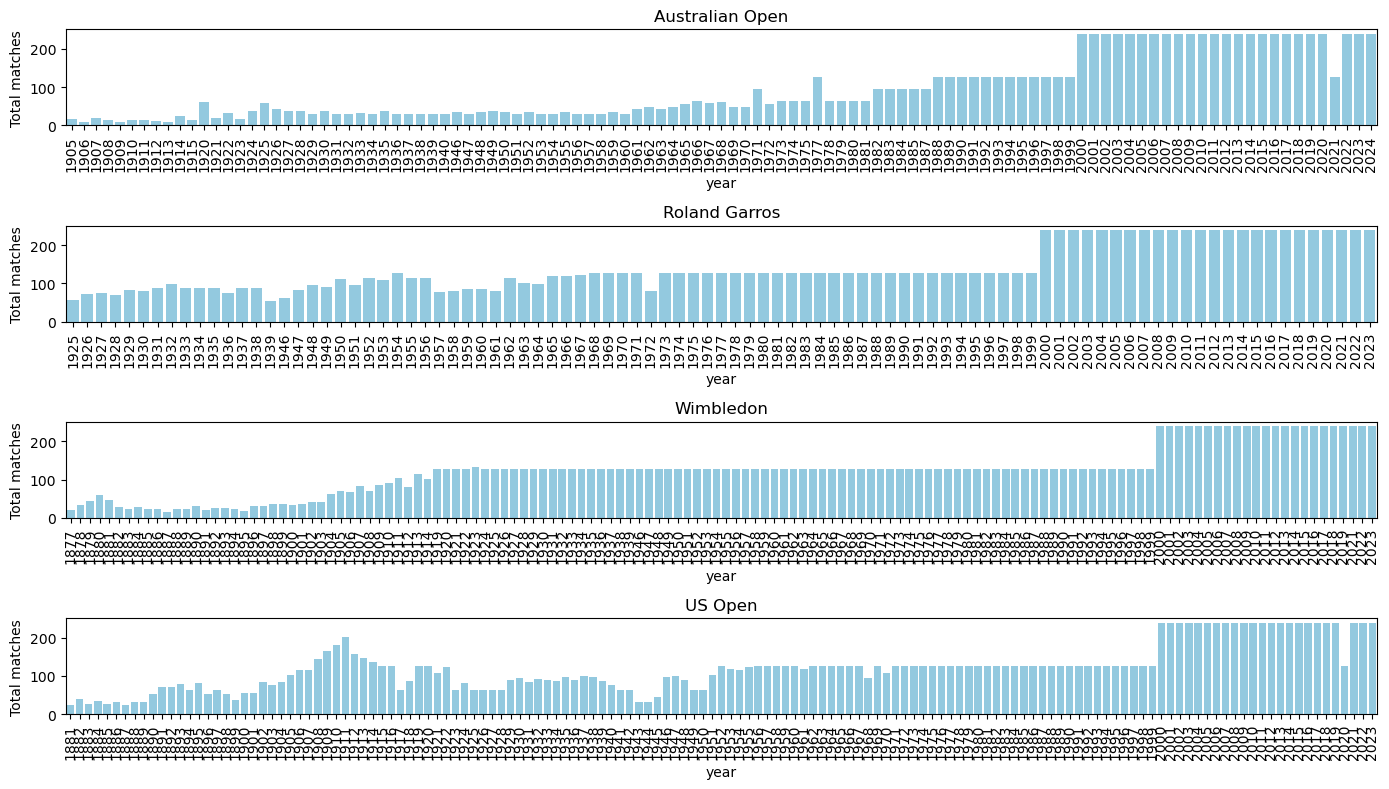

In [65]:
print("\nNumber of matches in database by year and Grand Slam")
grand_slam_matches_df = matches_df[matches_df['tourney_name'].isin(grand_slams_tourneys_names)]
matches_count = grand_slam_matches_df.groupby(['year', 'tourney_name']).size().reset_index(name='matches_count')
#La función .reset_index() se utiliza para convertir los índices del DataFrame en columnas normales. 
#Después de un groupby, el resultado devuelve un objeto con un índice jerárquico basado en las columnas agrupadas.

plt.figure(figsize=(14, 8))
for i, tourney in enumerate(grand_slams_tourneys_names):
    plt.subplot(len(grand_slams_tourneys_names), 1, i + 1)
    tourney_data = matches_count[matches_count['tourney_name'] == tourney]
    
    sns.barplot(
        data=tourney_data,
        x='year',
        y='matches_count',
        color='skyblue'
    )
    plt.title(f'{tourney}')
    plt.ylabel('Total matches')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Masters 1000 names normalization

In [66]:
masters1000_tourneys_names = matches_df[matches_df['tourney_level'] == 'Masters 1000']['tourney_name'].unique().tolist()
print("\nThese are Masters 1000 names:")
masters1000_tourneys_names


These are Masters 1000 names:


['Indian Wells Masters',
 'Miami Masters',
 'Monte Carlo Masters',
 'Madrid Masters',
 'Rome Masters',
 'Canada Masters',
 'Cincinnati Masters',
 'Shanghai Masters',
 'Paris Masters',
 'Key Biscayne',
 'Indian Wells',
 'Rome',
 'Montreal / Toronto',
 'Cincinnati',
 'Masters',
 'Hamburg Masters',
 'Stockholm Masters',
 'Boca West',
 'Masters Dec',
 'Stuttgart Masters',
 'Toronto',
 'Delray Beach',
 'Essen Masters']

In [67]:
print("\nCorrecting Masters 1000 tournaments names...")
matches_df.loc[
    (matches_df['tourney_level'] == 'Masters 1000') & (matches_df['tourney_name'] == 'Indian Wells'), 
    'tourney_name'
] = 'Indian Wells Masters'

matches_df.loc[
    (matches_df['tourney_level'] == 'Masters 1000') & (matches_df['tourney_name'] == 'Cincinnati'), 
    'tourney_name'
] = 'Cincinnati Masters'

matches_df.loc[
    (matches_df['tourney_level'] == 'Masters 1000') & (matches_df['tourney_name'] == 'Rome'), 
    'tourney_name'
] = 'Rome Masters'

matches_df.loc[
    (matches_df['tourney_level'] == 'Masters 1000') & (matches_df['tourney_name'] == 'Key Biscayne'), 
    'tourney_name'
] = 'Miami Masters'

names = ['Montreal / Toronto', 'Toronto']
matches_df.loc[
    (matches_df['tourney_level'] == 'Masters 1000') & (matches_df['tourney_name'].isin(names)), 
    'tourney_name'
] = 'Canada Masters'


Correcting Masters 1000 tournaments names...


In [68]:
print("\nDropping tourneys that are not Masters 1000...")
tourneys_to_drop = ['Masters', 'Stockholm Masters','Boca West','Masters Dec','Delray Beach']
matches_df = matches_df[~matches_df['tourney_name'].isin(tourneys_to_drop)]


Dropping tourneys that are not Masters 1000...


In [69]:
masters1000_tourneys_names = matches_df[matches_df['tourney_level'] == 'Masters 1000']['tourney_name'].unique().tolist()
print("\nThese are Masters 1000 names:")
masters1000_tourneys_names


These are Masters 1000 names:


['Indian Wells Masters',
 'Miami Masters',
 'Monte Carlo Masters',
 'Madrid Masters',
 'Rome Masters',
 'Canada Masters',
 'Cincinnati Masters',
 'Shanghai Masters',
 'Paris Masters',
 'Hamburg Masters',
 'Stuttgart Masters',
 'Essen Masters']

## Save all tables to SQLite

In [70]:
try:
    conn_cleaned = sqlite3.connect(destination_db_file_name)
    players_df.to_sql('players', conn_cleaned, if_exists='replace', index=False)
    matches_df.to_sql('matches', conn_cleaned, if_exists='replace', index=False)
    rankings_df.to_sql('rankings', conn_cleaned, if_exists='replace', index=False)
    
except sqlite3.Error as err:
    print(f"An error ocurred during connection to database {destination_db_file_name}: {err}")

## Close connections

In [71]:
try:
    cursor.close()
    conn.close()
    conn_cleaned.close()
    print("\nDatabases connections closed.\n")
    
except sqlite3.Error as err:
    print(f"An error ocurred during disconnection to database: {err}")


Databases connections closed.

